In [153]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
merged_final = pickle.load(open("merged_final.pkl", "rb"))

In [154]:
import pandas as pd

# Assuming your DataFrame is named 'merged_final'

# Step 1: Group by 'competition_id', 'season_id', 'team_id'
grouped_data = merged_final.groupby(['competition_id', 'season_id', 'team_id'])

# Step 2: Compute the sum of 'label' and 'probability' and count the rows for each group
agg_data = grouped_data.agg({'label': ['sum', 'count'], 'probability': 'sum', 'match_id': 'count', 
                              'player_id': 'first', 'team': 'first', 
                              'competition_name': 'first', 'season_name': 'first'})

# Step 3: Flatten the multi-level columns
agg_data.columns = agg_data.columns.map('_'.join).str.strip('_')

# Step 4: Compute the ratio of sum of probability to sum of label
agg_data['ratio'] = agg_data['probability_sum'] / agg_data['label_sum']

# Step 5: Sort the DataFrame by the 'ratio' column in descending order
agg_data = agg_data.sort_values(by=['competition_id', 'season_id', 'ratio'], ascending=[True, True, False])


In [163]:
# df = agg_data.loc[(12, 27)]
# [(12, 27),( 2, 27),( 11, 27),( 7, 27),( 9, 27),(1238,108),( 43, 3), ( 43, 106), (55, 43) ]

cid = 43
sid = 106

df = agg_data.loc[(cid, sid)]
len(df)

32

In [181]:
cid = 43
sid = 106

from statsbombpy import sb

matches = sb.matches(cid,sid)

# matches.head()
# print (home_team, away_team) combination
for i in range(len(matches)):
    home_team = matches.iloc[i]['home_team']
    away_team = matches.iloc[i]['away_team']
    print (home_team, away_team)

Serbia Switzerland
Argentina Australia
Australia Denmark
Brazil Serbia
Tunisia Australia
Ecuador Senegal
Netherlands Argentina
Uruguay South Korea
Morocco Portugal
Argentina France
Saudi Arabia Mexico
Poland Argentina
France Denmark
Argentina Mexico
Brazil Switzerland
Netherlands Qatar
Portugal Switzerland
England Senegal
Croatia Morocco
Argentina Croatia
England France
France Morocco
Croatia Brazil
Morocco Spain
Japan Croatia
Brazil South Korea
France Poland
Netherlands United States
Portugal Uruguay
Spain Germany
Cameroon Serbia
Japan Costa Rica
Belgium Morocco
Germany Japan
United States Wales
Qatar Ecuador
Qatar Senegal
Argentina Saudi Arabia
South Korea Ghana
Portugal Ghana
Poland Saudi Arabia
Croatia Belgium
Ghana Uruguay
Costa Rica Germany
Spain Costa Rica
Switzerland Cameroon
Senegal Netherlands
Croatia Canada
Cameroon Brazil
France Australia
Iran United States
Morocco Croatia
Canada Morocco
Tunisia France
Netherlands Ecuador
Wales Iran
England United States
England Iran
Belgiu

/Users/adnanazmat/miniconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [165]:
# make df['team_first'].iloc[0] a string
df['team_first'] = df['team_first'].apply(lambda x: str(x))

# remove first 5 characters from df['team_first'] and remove everything from "Name:" 
df['team_first'] = df['team_first'].apply(lambda x: x[5:])
df['team_first'] = df['team_first'].apply(lambda x: x.split("Name:")[0])

# remove \n from df['team_first']
df['team_first'] = df['team_first'].apply(lambda x: x.replace("\n", ""))

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_first'] = df['team_first'].apply(lambda x: str(x))
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_first'] = df['team_first'].apply(lambda x: x[5:])
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/324829612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [166]:
df.head()

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio
team_id,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989


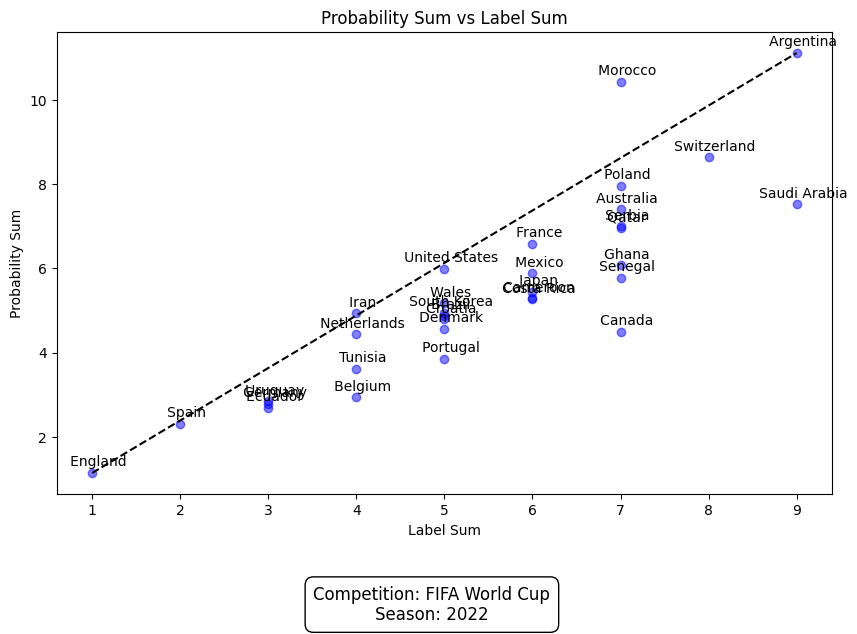

In [167]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum']
label_sum = df['label_sum']
team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum vs Label Sum')
ax.set_xlabel('Label Sum')
ax.set_ylabel('Probability Sum')
plt.show()

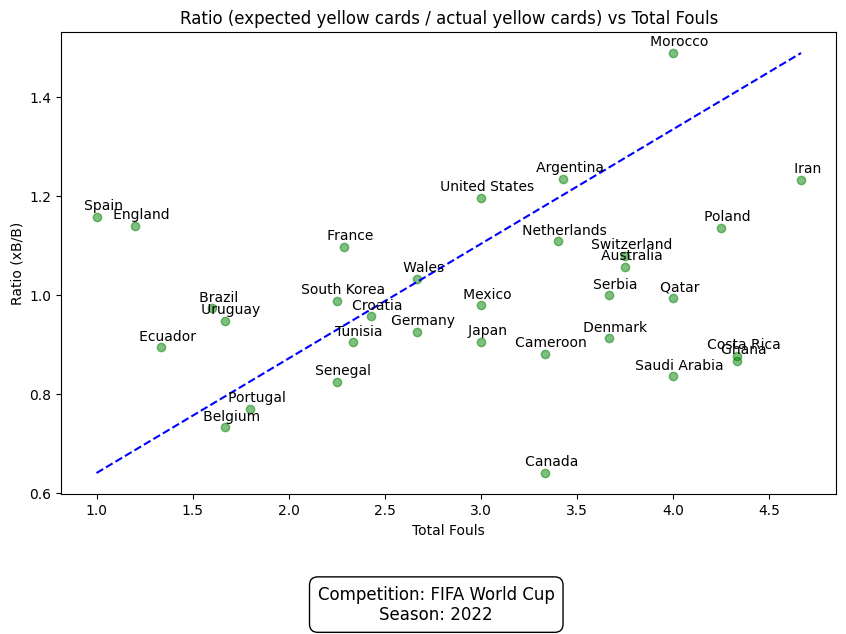

In [204]:
# Ratio Vs. Label Count Plot

# Extracting relevant columns
label_count = df['label_count'] / df['match_count']
ratio = df['ratio']
team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0]

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_count, ratio, color='green', alpha=0.5)

# Adding a diagonal line
ax.plot([label_count.min(), label_count.max()], [ratio.min(), ratio.max()], linestyle='--', color='blue', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_count.iloc[i], ratio.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Ratio (expected yellow cards / actual yellow cards) vs Fouls per match')
ax.set_xlabel('Fouls per match')
ax.set_ylabel('Ratio (xB/B)')
plt.show()


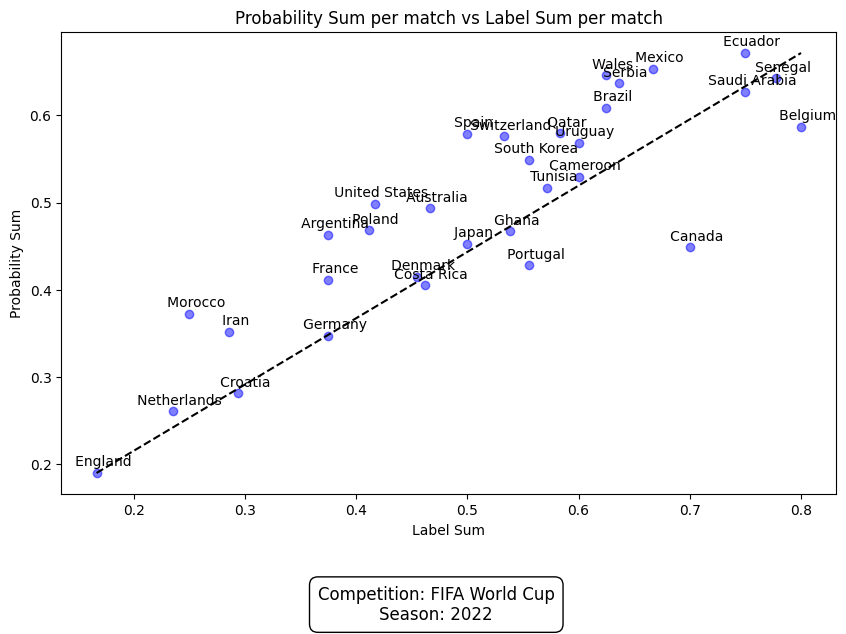

In [169]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_id_count']
label_sum = df['label_sum'] / df['match_id_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum per match vs Label Sum per match')
ax.set_xlabel('Label Sum')
ax.set_ylabel('Probability Sum')
plt.show()

In [170]:
df['team_first']

team_id
788              Morocco
779            Argentina
797                 Iran
1839       United States
772                Spain
768              England
789               Poland
941          Netherlands
771               France
773          Switzerland
792            Australia
907                Wales
786               Serbia
3566               Qatar
791          South Korea
794               Mexico
781               Brazil
785              Croatia
783              Uruguay
770              Germany
776              Denmark
778                Japan
777              Tunisia
3565             Ecuador
2722            Cameroon
795           Costa Rica
4885               Ghana
799         Saudi Arabia
787              Senegal
780             Portugal
782              Belgium
1833              Canada
Name: team_first, dtype: object

In [173]:
df.head(32)

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio
team_id,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989
768,1,6,1.140764,6,3336,England,FIFA World Cup,2022,1.140764
789,7,17,7.955665,17,11737,Poland,FIFA World Cup,2022,1.136524
941,4,17,4.436334,17,2988,Netherlands,FIFA World Cup,2022,1.109084
771,6,16,6.585887,16,5477,France,FIFA World Cup,2022,1.097648


In [172]:
len(df)

32

In [183]:
all = """
Serbia Switzerland
Argentina Australia
Australia Denmark
Brazil Serbia
Tunisia Australia
Ecuador Senegal
Netherlands Argentina
Uruguay SouthKorea
Morocco Portugal
Argentina France
SaudiArabia Mexico
Poland Argentina
France Denmark
Argentina Mexico
Brazil Switzerland
Netherlands Qatar
Portugal Switzerland
England Senegal
Croatia Morocco
Argentina Croatia
England France
France Morocco
Croatia Brazil
Morocco Spain
Japan Croatia
Brazil SouthKorea
France Poland
Netherlands UnitedStates
Portugal Uruguay
Spain Germany
Cameroon Serbia
Japan CostaRica
Belgium Morocco
Germany Japan
UnitedStates Wales
Qatar Ecuador
Qatar Senegal
Argentina SaudiArabia
SouthKorea Ghana
Portugal Ghana
Poland SaudiArabia
Croatia Belgium
Ghana Uruguay
CostaRica Germany
Spain CostaRica
Switzerland Cameroon
Senegal Netherlands
Croatia Canada
Cameroon Brazil
France Australia
Iran UnitedStates
Morocco Croatia
Canada Morocco
Tunisia France
Netherlands Ecuador
Wales Iran
England UnitedStates
England Iran
Belgium Canada
Mexico Poland
SouthKorea Portugal
Wales England
Japan Spain
Denmark Tunisia
"""

# print count of each team
import re
from collections import Counter
teams = re.findall(r'\w+', all)
print(Counter(teams))

Counter({'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3})


In [184]:
# {'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3}

In [187]:
# add column team to df which is team_first but with spaces removed
df['team'] = df['team_first'].apply(lambda x: x.replace(" ", ""))

# now add match_count column to df. Use {'Argentina': 7, 'Morocco': 7, 'France': 7, 'Croatia': 7, 'Brazil': 5, 'Netherlands': 5, 'Portugal': 5, 'England': 5, 'Switzerland': 4, 'Australia': 4, 'Senegal': 4, 'SouthKorea': 4, 'Poland': 4, 'Spain': 4, 'Japan': 4, 'UnitedStates': 4, 'Serbia': 3, 'Denmark': 3, 'Tunisia': 3, 'Ecuador': 3, 'Uruguay': 3, 'SaudiArabia': 3, 'Mexico': 3, 'Qatar': 3, 'Germany': 3, 'Cameroon': 3, 'CostaRica': 3, 'Belgium': 3, 'Wales': 3, 'Ghana': 3, 'Canada': 3, 'Iran': 3} to get match_count for each team
df['match_count'] = df['team'].map(Counter(teams))

/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/3579095910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team'] = df['team_first'].apply(lambda x: x.replace(" ", ""))
/var/folders/w2/cwqdzbx140l41n8zvm81gvbh0000gn/T/ipykernel_86108/3579095910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_count'] = df['team'].map(Counter(teams))


In [188]:
df.head(32)

,label_sum,label_count,probability_sum,match_id_count,player_id_first,team_first,competition_name_first,season_name_first,ratio,team,match_count
team_id,,,,,,,,,,,
788,7,28,10.425293,28,23774,Morocco,FIFA World Cup,2022,1.489328,Morocco,7
779,9,24,11.112382,24,19597,Argentina,FIFA World Cup,2022,1.234709,Argentina,7
797,4,14,4.931209,14,5235,Iran,FIFA World Cup,2022,1.232802,Iran,3
1839,5,12,5.985026,12,21881,United States,FIFA World Cup,2022,1.197005,UnitedStates,4
772,2,4,2.315978,4,4353,Spain,FIFA World Cup,2022,1.157989,Spain,4
768,1,6,1.140764,6,3336,England,FIFA World Cup,2022,1.140764,England,5
789,7,17,7.955665,17,11737,Poland,FIFA World Cup,2022,1.136524,Poland,4
941,4,17,4.436334,17,2988,Netherlands,FIFA World Cup,2022,1.109084,Netherlands,5
771,6,16,6.585887,16,5477,France,FIFA World Cup,2022,1.097648,France,7


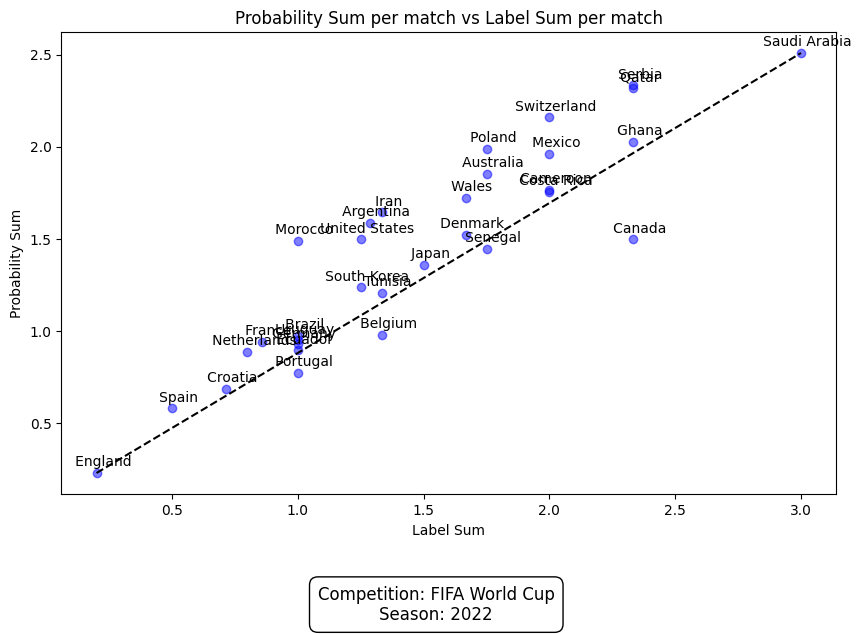

In [196]:
# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
for i, team_name in enumerate(team_names):
    ax.annotate(team_name, (label_sum.iloc[i], probability_sum.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum per match vs Label Sum per match')
ax.set_xlabel('Label Sum')
ax.set_ylabel('Probability Sum')
plt.show()

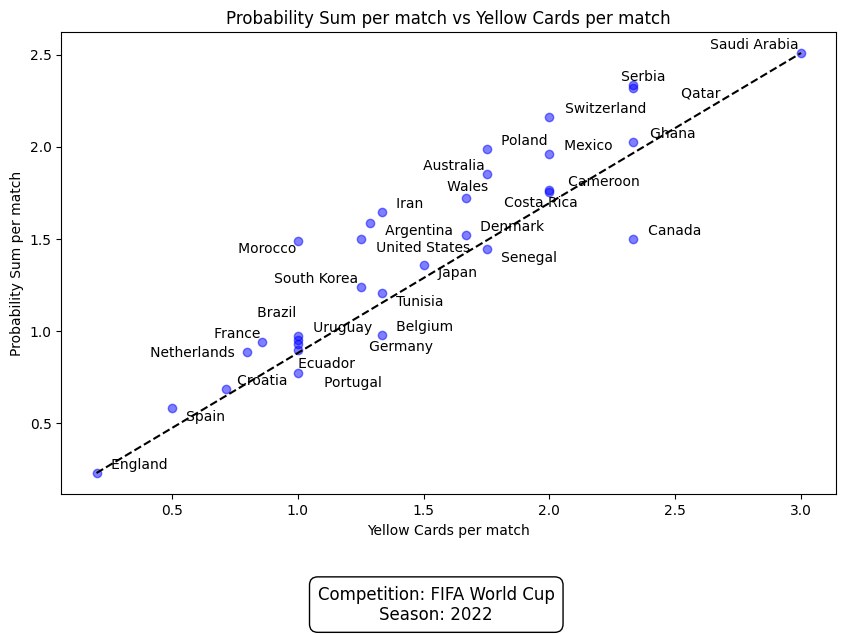

In [198]:
# Importing the library
from adjustText import adjust_text

# probability_sum vs. label_sum plot

# Extracting relevant columns
probability_sum = df['probability_sum'] / df['match_count']
label_sum = df['label_sum'] / df['match_count']

team_names = df.index.map(df['team_first']).tolist()  # Map team IDs to country names
competition_name = df['competition_name_first'].iloc[0]  # Assuming the competition name is the same for all rows
season_name = df['season_name_first'].iloc[0] # Assuming the season name is the same for all rows

# Plotting with different colors for different teams
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(label_sum, probability_sum, color='blue', alpha=0.5)

# Adding a diagonal line
ax.plot([label_sum.min(), label_sum.max()], [probability_sum.min(), probability_sum.max()], linestyle='--', color='black', label='Diagonal line')

# Annotating each point with the team name
texts = []
for i, team_name in enumerate(team_names):
    texts.append(ax.text(label_sum.iloc[i], probability_sum.iloc[i], team_name))

# Using adjust_text to prevent overlapping
adjust_text(texts)

# Adding competition name and season name as captions
caption_text = f'Competition: {competition_name}\nSeason: {season_name}'
fig.text(0.5, -0.1, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_title('Probability Sum per match vs Yellow Cards per match')
ax.set_xlabel('Yellow Cards per match')
ax.set_ylabel('Probability Sum per match')
plt.show()
